# Prediction using GPR data

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.mplot3d import Axes3D 

In [4]:
path = '/Users/paw_paw/Library/CloudStorage/GoogleDrive-keyuqing597@gmail.com/我的云端硬盘/PC5287_M.SC Coursework Thesis for Physics And Technology/data set'

$$
\langle T_{ij} \rangle = T_i\cdot \frac{m_i\cdot n_j}{(m_i+s_{ij})(m_i+n_j+s_{ij})}
$$
in which:
$$
T_i=\sum_{j\neq i}T_{ij}
$$
and $\langle T_{ij} \rangle$ means tha mean value of $T_{ij}$ within a period of time. 

## Import population flux data

In [19]:
T_i_bus = pd.read_csv(path + '/Total_bus_flux2019.csv').drop(columns='Unnamed: 0')

T_ij_bus= pd.read_csv(path+'/Total_bus_flux_ij2019.csv').drop(columns='Unnamed: 0')

T_i_MRT = pd.read_csv(path + '/Total_MRT_flux2019.csv').drop(columns='Unnamed: 0')

T_ij_MRT = pd.read_csv(path + '/Total_MRT_flux_ij2019.csv').drop(columns='Unnamed: 0')

## import the geometry data 

In [446]:
#read KML file
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [447]:
pa = gpd.read_file(path+'/master-plan-2019-planning-area-boundary-no-sea/planning-boundary-area.kml', \
                            driver='KML')
pa = pa.to_crs(3414)

def extract_desc_pa(desc_pa):
    return desc_pa.split('PLN_AREA_N')[1].split('<td>')[1].split('<')[0]

pa['PLN_AREA_N'] = pa.Description.apply(extract_desc_pa)

pa['centroid'] = pa.centroid

In [448]:
pa_dict = pa.set_index(['PLN_AREA_N'])['centroid'].to_dict()

## import population (GPR) data 

In [12]:
GPR = pd.read_csv(path+'/SG_GPR_sorted.csv')

In [13]:
from shapely import wkt

GPR['geometry'] = GPR['geometry'].apply(wkt.loads)
GPR = gpd.GeoDataFrame(GPR, crs='epsg:3414')

In [14]:
GPR

,Unnamed: 0,GPR,GPR_NUM,PLN_AREA_N,SUBZONE_N,SHAPE_Area,POP_DENS,geometry
0,0,1.0,1.0,TUAS,TUAS VIEW EXTENSION,735026.472606,735026.472606,"POLYGON ((3606.500 26171.307, 3606.500 26171.3..."
1,1,1.0,1.0,TUAS,TUAS VIEW EXTENSION,345914.636037,345914.636037,"POLYGON ((3606.131 27006.302, 3606.500 26171.3..."
2,2,1.0,1.0,TUAS,TUAS VIEW EXTENSION,9411.081297,9411.081297,"POLYGON ((3606.131 27006.302, 2668.620 27006.3..."
3,3,1.0,1.0,TUAS,TUAS VIEW EXTENSION,966310.427138,966310.427138,"POLYGON ((3240.090 28525.774, 3856.615 28295.2..."
4,4,1.0,1.0,TUAS,TUAS VIEW EXTENSION,8077.741680,8077.741680,"POLYGON ((3855.740 28295.878, 3856.615 28295.2..."
...,...,...,...,...,...,...,...,...
33112,33112,1.4,1.4,MARINE PARADE,KATONG,288.225272,403.515381,"POLYGON ((35964.658 32631.632, 35952.880 32622..."
33113,33113,1.4,1.4,MARINE PARADE,KATONG,130.410105,182.574148,"POLYGON ((35930.834 32637.795, 35925.593 32633..."
33114,33114,1.4,1.4,MARINE PARADE,KATONG,164.929047,230.900666,"POLYGON ((35945.784 32617.567, 35940.580 32613..."
33115,33115,1.4,1.4,MARINE PARADE,KATONG,158.483763,221.877268,"POLYGON ((35940.580 32613.595, 35938.195 32611..."


In [451]:
Pop_dens = pd.DataFrame()

Pop_dens = GPR.groupby(GPR['PLN_AREA_N']).sum(numeric_only=True)["POP_DENS"].reset_index()

In [452]:
Pop_dens

,PLN_AREA_N,POP_DENS
0,ANG MO KIO,1.103508e+07
1,BEDOK,2.057210e+07
2,BISHAN,6.030975e+06
3,BOON LAY,1.032779e+07
4,BUKIT BATOK,9.928237e+06
5,BUKIT MERAH,1.095066e+07
6,BUKIT PANJANG,6.631214e+06
7,BUKIT TIMAH,4.795816e+06
8,CHANGI,1.815505e+06
9,CHOA CHU KANG,8.618132e+06


In [17]:
GPR['centroid']=GPR.centroid

define the function to get s_ij. 

In [18]:
GPR['centroids'] = GPR['centroid'].apply(lambda x: x.wkt).values

In [19]:
GPR_centroid_pop = GPR.set_index(['centroids'])['POP_DENS'].to_dict()

In [20]:
GPR_centroid_pop

{'POINT (3303.4674857975133 25536.758844027878)': 735026.4726058176,
 'POINT (3369.787445942201 26662.580684279812)': 345914.63603703806,
 'POINT (3137.3975924738324 27011.322695282302)': 9411.08129716916,
 'POINT (3328.5781517900323 27771.754351749038)': 966310.4271382936,
 'POINT (3528.3774539486135 28424.89693507803)': 8077.741679995482,
 'POINT (3206.291614198999 28545.62596205316)': 594.7707089272793,
 'POINT (3237.635125172143 28602.870653103677)': 5823.800199890269,
 'POINT (3795.8878508351254 28851.096403711224)': 500168.6809357706,
 'POINT (3694.5909936843827 29039.62144316645)': 55976.989844332405,
 'POINT (4463.261429321839 27775.09664467184)': 330781.89861221414,
 'POINT (4322.5672159483765 27784.458255667447)': 4595.2251423120015,
 'POINT (5827.271361882123 27363.111969987334)': 806709.4382743764,
 'POINT (4085.562311614168 28170.310818929305)': 100097.30486754012,
 'POINT (4103.733831359051 28528.20584670154)': 53616.40893168919,
 'POINT (4135.849975856287 28338.607353757

In [21]:
import shapely

In [22]:
def s_ij(pa_i, pa_j):
    r_ij = pa_i.distance(pa_j)
    s_ij = 0 
    gpr_ctr = shapely.wkt.loads(list(GPR_centroid_pop.keys())[0])
    
    for k in list(GPR_centroid_pop.keys()):
        if shapely.wkt.loads(k).distance(pa_j)<=r_ij:
            s_ij = s_ij + GPR_centroid_pop.get(k)
    return s_ij 

In [23]:
pa_centroid=pa.set_index(['PLN_AREA_N'])['centroid'].to_dict()

In [24]:
#test s_ij
s_ij(pa_centroid.get('NEWTON'),pa_centroid.get('TANGLIN'))

12836423.489157546

## Prediction

In [25]:
def get_T_i(pa):
    
    return T_i_bus.set_index(['ORIGIN_loc'])['TOTAL_TRIPS'].to_dict().get(pa)+\
T_i_bus.set_index(['ORIGIN_loc'])['TOTAL_TRIPS'].to_dict().get(pa)

In [80]:
def get_pop(pa):
    pa = str(pa)
    if Pop_dens.set_index(['PLN_AREA_N'])['POP_DENS'].to_dict().get(pa)!= None:
        return Pop_dens.set_index(['PLN_AREA_N'])['POP_DENS'].to_dict().get(pa)
    else:
        return float(0)

In [146]:
def func(pa_i, pa_j):
    T_i = get_T_i(pa_i)
    m_i = get_pop(pa_i)
    n_j = get_pop(pa_j)
    s = s_ij(pa_centroid.get(pa_i),pa_centroid.get(pa_j))
    try:
        return T_i*m_i*n_j/((m_i+s)*(m_i+n_j+s))
    except ZeroDivisionError: 
        return None

In [147]:
func('ANG MO KIO','CHANGI')

6072.982452540437

In [83]:
R_ij = pd.read_csv(path +'/distance_pa_to_pa.csv').drop(columns='Unnamed: 0')
Prediction = R_ij.copy()
Prediction

,PA_name,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
0,BUKIT MERAH,0.000000,11801.153055,7285.555760,11727.605889,21219.086601,15069.878839,8552.513484,12441.932351,10913.639880,...,2728.259723,5800.375314,26663.970694,9595.800021,9052.865975,13940.794275,12085.688405,19498.609475,19189.279821,15778.005629
1,BUKIT PANJANG,11801.153055,0.000000,4523.459054,3321.018256,25588.235593,3541.153151,5612.306333,13003.483794,7161.660539,...,11382.891056,16994.785211,32314.728877,18303.253061,13926.812556,15799.844748,16434.287300,9741.338977,8486.111357,8907.549437
2,BUKIT TIMAH,7285.555760,4523.459054,0.000000,5289.399414,23503.226876,7822.238515,3604.512914,11639.256997,6455.612039,...,7144.707832,12631.143946,29906.421553,14584.338004,11043.957271,14186.186644,13589.709392,12966.105831,12440.999877,10729.064832
3,CENTRAL WATER CATCHMENT,11727.605889,3321.018256,5289.399414,0.000000,22631.074216,6090.310227,7931.975597,9964.978992,10078.689893,...,10554.169342,16172.672171,29451.542056,16511.149567,11603.113070,12783.470977,18658.600711,12724.814637,7462.027830,5830.855805
4,CHANGI,21219.086601,25588.235593,23503.226876,22631.074216,0.000000,28721.187147,26933.095315,12672.382869,29848.896622,...,18736.425191,18079.710186,6963.328168,12612.107756,12680.341719,9854.516628,33281.851530,35305.476672,26431.880659,20016.590581
5,CHOA CHU KANG,15069.878839,3541.153151,7822.238515,6090.310227,28721.187147,0.000000,7665.759339,16054.709594,7949.201684,...,14861.216911,20432.304444,35531.702258,21842.495828,17378.827264,18873.452155,17795.965181,6695.187847,7637.796731,10525.326271
6,CLEMENTI,8552.513484,5612.306333,3604.512914,7931.975597,26933.095315,7665.759339,0.000000,15237.912494,2915.876061,...,9455.620533,14335.079601,33205.065530,17242.020949,14335.773634,17754.262382,10850.901590,10976.676667,14089.693860,13724.053165
7,HOUGANG,12441.932351,13003.483794,11639.256997,9964.978992,12672.382869,16054.709594,15237.912494,0.000000,18087.006227,...,9764.025224,13074.963742,19535.809090,10063.800977,4726.302388,2819.030407,23786.112430,22669.752026,14453.758890,8165.684903
8,JURONG EAST,10913.639880,7161.660539,6455.612039,10078.689893,29848.896622,7949.201684,2915.876061,18087.006227,0.000000,...,12163.252093,16703.135832,36105.108163,19975.136500,17243.648729,20639.451542,9857.936895,9272.310087,15231.572635,15900.703937
9,JURONG WEST,15228.336785,8074.721069,9634.319694,11395.311798,33015.701761,6764.542902,6759.275772,20720.697846,4450.050813,...,16203.240234,21028.552713,39513.990047,23962.488549,20673.631073,23439.532405,12975.010724,5046.591189,14353.166329,16805.419367


It fails, lets see whats the problem. 

In [449]:
pa

,Name,Description,geometry,PLN_AREA_N,centroid
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((26228.902 30746.172 0.000, 26280.4...",BUKIT MERAH,POINT (26912.598 28387.822)
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((21448.724 41356.741 0.000, 21508.5...",BUKIT PANJANG,POINT (21287.044 38761.845)
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((24031.387 36694.742 0.000, 24076.6...",BUKIT TIMAH,POINT (23256.937 34689.842)
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((24934.967 44017.724 0.000, 24953.6...",CENTRAL WATER CATCHMENT,POINT (24425.213 39848.609)
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((45094.369 42203.459 0.000, 45174.6...",CHANGI,POINT (46724.354 35986.766)
5,kml_6,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((18349.061 43028.676 0.000, 18383.8...",CHOA CHU KANG,POINT (18415.053 40833.423)
6,kml_7,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((20627.133 34823.182 0.000, 20628.0...",CLEMENTI,POINT (19923.845 33317.612)
7,kml_8,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((33363.801 41074.684 0.000, 33494.8...",HOUGANG,POINT (34285.759 38409.707)
8,kml_9,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((18003.863 36295.207 0.000, 18060.7...",JURONG EAST,POINT (17024.585 33006.775)
9,kml_10,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((16293.567 36778.095 0.000, 16297.1...",JURONG WEST,POINT (13708.654 35974.528)


In [459]:
pd.concat([Pop_dens.PLN_AREA_N,pa.PLN_AREA_N]).drop_duplicates(keep = False).reset_index().drop(columns='index')

,PLN_AREA_N
0,CENTRAL WATER CATCHMENT
1,LIM CHU KANG
2,NORTH-EASTERN ISLANDS
3,SIMPANG
4,SOUTHERN ISLANDS
5,MARINA EAST
6,CHANGI BAY


In [112]:
pd.concat([T_i_bus.ORIGIN_loc,pa.PLN_AREA_N])\
.drop_duplicates(keep = False).reset_index().drop(columns='index')

,0
0,NORTH-EASTERN ISLANDS
1,SIMPANG
2,MARINA EAST
3,MARINA SOUTH
4,ORCHARD
5,OUTRAM
6,STRAITS VIEW
7,CHANGI BAY
8,WESTERN ISLANDS


In [113]:
pd.concat([T_i_MRT.ORIGIN_loc,pa.PLN_AREA_N])\
.drop_duplicates(keep = False).reset_index().drop(columns='index')

,0
0,CENTRAL WATER CATCHMENT
1,LIM CHU KANG
2,MANDAI
3,NORTH-EASTERN ISLANDS
4,BOON LAY
5,SELETAR
6,SIMPANG
7,SOUTHERN ISLANDS
8,TENGAH
9,MARINA EAST


We can see that GPR, bus and MRT flux data all have missing data more or less.    By looking into the background of these planning areas, we can find that they are all places that lack residents. 

In [88]:
def fix(non_fixed,non_fixed_col):
    temp = pd.concat([non_fixed[non_fixed_col],pa.PLN_AREA_N]).drop_duplicates(keep = False).\
    reset_index().drop(columns='index')
    temp[non_fixed_col] = pd.DataFrame(np.zeros(temp.shape[0]))
    return pd.concat([non_fixed,temp]).reset_index().drop(columns='index')

In [89]:
Pop_dens=fix(Pop_dens,'PLN_AREA_N')

In [90]:
Pop_dens

,PLN_AREA_N,POP_DENS
0,ANG MO KIO,1.103508e+07
1,BEDOK,2.057210e+07
2,BISHAN,6.030975e+06
3,BOON LAY,1.032779e+07
4,BUKIT BATOK,9.928237e+06
5,BUKIT MERAH,1.095066e+07
6,BUKIT PANJANG,6.631214e+06
7,BUKIT TIMAH,4.795816e+06
8,CHANGI,1.815505e+06
9,CHOA CHU KANG,8.618132e+06


In [137]:
temp = pd.concat([T_i_bus['ORIGIN_loc'],pa.PLN_AREA_N]).drop_duplicates(keep = False).\
    reset_index().drop(columns='index')

temp=temp.rename(columns={0:'ORIGIN_loc'})

temp['TOTAL_TRIPS'] = pd.DataFrame(np.zeros(temp.shape[0]))

T_i_bus=pd.concat([T_i_bus,temp]).reset_index().drop(columns='index')

T_i_bus

,ORIGIN_loc,TOTAL_TRIPS
0,ANG MO KIO,5753076.0
1,BEDOK,8076632.0
2,BISHAN,2680822.0
3,BOON LAY,186710.0
4,BUKIT BATOK,3588419.0
5,BUKIT MERAH,4666840.0
6,BUKIT PANJANG,2520233.0
7,BUKIT TIMAH,2222822.0
8,CENTRAL WATER CATCHMENT,168233.0
9,CHANGI,1164105.0


In [136]:
temp = pd.concat([T_i_MRT['ORIGIN_loc'],pa.PLN_AREA_N]).drop_duplicates(keep = False).\
    reset_index().drop(columns='index')

temp=temp.rename(columns={0:'ORIGIN_loc'})

temp['TOTAL_TRIPS'] = pd.DataFrame(np.zeros(temp.shape[0]))

T_i_MRT=pd.concat([T_i_MRT,temp]).reset_index().drop(columns='index')

T_i_MRT

,ORIGIN_loc,TOTAL_TRIPS
0,ANG MO KIO,2537780.0
1,BEDOK,2822888.0
2,BISHAN,1861313.0
3,BUKIT BATOK,2393861.0
4,BUKIT MERAH,4074769.0
5,BUKIT PANJANG,1522764.0
6,BUKIT TIMAH,1451151.0
7,CHANGI,593403.0
8,CHOA CHU KANG,2720252.0
9,CLEMENTI,1432139.0


In [150]:
for pa_i in Prediction['PA_name']:
    Prediction[pa_i]=Prediction['PA_name'].apply(func,args=([pa_i]))            

In [151]:
Prediction

,PA_name,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
0,BUKIT MERAH,4.666840e+06,1.136999e+04,3.769311e+04,0.0,3.480235e+03,1.131059e+04,4.901424e+04,2.719318e+04,4.798556e+04,...,67618.972741,134514.467679,0.0,2.650676e+04,3.542918e+04,6281.776852,214394.403657,32.899272,1.486710e+04,1.086539e+04
1,BUKIT PANJANG,1.230493e+04,2.520233e+06,1.364503e+05,0.0,8.407048e+02,2.211305e+05,6.398392e+04,8.487340e+03,3.919223e+04,...,1373.948154,642.986395,0.0,1.953350e+03,7.642319e+03,1765.153553,22769.765683,74.038916,9.609034e+04,2.587158e+04
2,BUKIT TIMAH,3.685087e+04,9.119385e+04,2.222822e+06,0.0,6.590896e+02,2.510611e+04,1.382593e+05,6.470556e+03,3.192913e+04,...,2895.347535,1321.086737,0.0,1.612321e+03,6.071609e+03,1351.377938,26973.849963,23.104799,2.220989e+04,1.013956e+04
3,CENTRAL WATER CATCHMENT,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
4,CHANGI,2.532054e+02,1.429601e+02,1.039617e+02,0.0,1.164105e+06,1.849335e+02,2.134934e+02,1.167394e+03,3.566532e+02,...,37.479620,70.044381,0.0,4.832779e+02,1.096958e+03,459.625992,680.698800,0.548468,3.455395e+02,3.644700e+02
5,CHOA CHU KANG,8.696216e+03,4.264176e+05,1.786515e+04,0.0,1.116033e+03,3.591399e+06,4.054148e+04,1.060257e+04,5.629717e+04,...,956.097940,666.595137,0.0,2.366021e+03,9.240693e+03,2268.167054,35694.963199,982.190486,1.930994e+05,2.993928e+04
6,CLEMENTI,6.925405e+04,1.439820e+05,4.841049e+05,0.0,1.516572e+03,7.928808e+04,3.606280e+06,1.317659e+04,7.670004e+05,...,4493.206177,2572.042950,0.0,4.491719e+03,1.542793e+04,2903.036361,292134.937609,118.650201,4.016707e+04,1.279406e+04
7,HOUGANG,5.578704e+04,1.655382e+04,1.475560e+04,0.0,3.126594e+04,1.797158e+04,1.852461e+04,6.003248e+06,2.711828e+04,...,10934.272187,9648.460998,0.0,3.972773e+04,4.026953e+05,553858.833984,59858.543510,43.053512,9.177479e+04,1.772212e+05
8,JURONG EAST,5.289473e+04,1.031333e+05,7.067010e+04,0.0,1.903902e+03,1.082831e+05,7.512737e+05,1.706031e+04,3.698546e+06,...,3625.427811,2404.684280,0.0,5.718059e+03,1.810467e+04,3694.762432,641236.152166,261.013403,4.269459e+04,1.256209e+04
9,JURONG WEST,3.500625e+04,1.329715e+05,3.571650e+04,0.0,3.506807e+03,3.924424e+05,2.288060e+05,3.320370e+04,7.554681e+05,...,3139.806154,2604.471023,0.0,7.374431e+03,2.833366e+04,7014.507096,374190.959289,11285.263966,1.268151e+05,2.514622e+04


In [159]:
Prediction.to_csv(path+'/Prediction2019_gpr.csv')

# Evaluation

In [250]:
Prediction = pd.read_csv(path+'/Prediction2019_gpr.csv').drop(columns='Unnamed: 0')

In [251]:
Prediction.set_index('PA_name',inplace=True)

In [252]:
Prediction

,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,JURONG WEST,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
PA_name,,,,,,,,,,,,,,,,,,,,,
BUKIT MERAH,4.666840e+06,1.136999e+04,3.769311e+04,0.0,3.480235e+03,1.131059e+04,4.901424e+04,2.719318e+04,4.798556e+04,3.403135e+04,...,67618.972741,134514.467679,0.0,2.650676e+04,3.542918e+04,6281.776852,214394.403657,32.899272,1.486710e+04,1.086539e+04
BUKIT PANJANG,1.230493e+04,2.520233e+06,1.364503e+05,0.0,8.407048e+02,2.211305e+05,6.398392e+04,8.487340e+03,3.919223e+04,3.593549e+04,...,1373.948154,642.986395,0.0,1.953350e+03,7.642319e+03,1765.153553,22769.765683,74.038916,9.609034e+04,2.587158e+04
BUKIT TIMAH,3.685087e+04,9.119385e+04,2.222822e+06,0.0,6.590896e+02,2.510611e+04,1.382593e+05,6.470556e+03,3.192913e+04,1.606942e+04,...,2895.347535,1321.086737,0.0,1.612321e+03,6.071609e+03,1351.377938,26973.849963,23.104799,2.220989e+04,1.013956e+04
CENTRAL WATER CATCHMENT,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
CHANGI,2.532054e+02,1.429601e+02,1.039617e+02,0.0,1.164105e+06,1.849335e+02,2.134934e+02,1.167394e+03,3.566532e+02,3.798030e+02,...,37.479620,70.044381,0.0,4.832779e+02,1.096958e+03,459.625992,680.698800,0.548468,3.455395e+02,3.644700e+02
CHOA CHU KANG,8.696216e+03,4.264176e+05,1.786515e+04,0.0,1.116033e+03,3.591399e+06,4.054148e+04,1.060257e+04,5.629717e+04,1.008612e+05,...,956.097940,666.595137,0.0,2.366021e+03,9.240693e+03,2268.167054,35694.963199,982.190486,1.930994e+05,2.993928e+04
CLEMENTI,6.925405e+04,1.439820e+05,4.841049e+05,0.0,1.516572e+03,7.928808e+04,3.606280e+06,1.317659e+04,7.670004e+05,1.147087e+05,...,4493.206177,2572.042950,0.0,4.491719e+03,1.542793e+04,2903.036361,292134.937609,118.650201,4.016707e+04,1.279406e+04
HOUGANG,5.578704e+04,1.655382e+04,1.475560e+04,0.0,3.126594e+04,1.797158e+04,1.852461e+04,6.003248e+06,2.711828e+04,2.830709e+04,...,10934.272187,9648.460998,0.0,3.972773e+04,4.026953e+05,553858.833984,59858.543510,43.053512,9.177479e+04,1.772212e+05
JURONG EAST,5.289473e+04,1.031333e+05,7.067010e+04,0.0,1.903902e+03,1.082831e+05,7.512737e+05,1.706031e+04,3.698546e+06,4.158800e+05,...,3625.427811,2404.684280,0.0,5.718059e+03,1.810467e+04,3694.762432,641236.152166,261.013403,4.269459e+04,1.256209e+04


In [253]:
def bus_flux(x,y):
    pa1 = Prediction.index[x]
    pa2 = Prediction.index[y]
    
    try:
        return T_ij_bus[(T_ij_bus['ORIGIN_loc']==pa1)&\
                        (T_ij_bus['DESTINATION_loc']==pa2)]['TOTAL_TRIPS'].values[0]
    except:
        return 0

In [254]:
bus = pd.DataFrame(np.zeros((55,55)))

for i in range(0,55):
    for j in range(0,55):
        bus[i][j]=bus_flux(i,j)

In [255]:
def MRT_flux(x,y):
    pa1 = Prediction.index[x]
    pa2 = Prediction.index[y]
    
    try:
        return T_ij_MRT[(T_ij_MRT['ORIGIN_loc']==pa1)&\
                        (T_ij_MRT['DESTINATION_loc']==pa2)]['TOTAL_TRIPS'].values[0]
    except:
        return 0
    
MRT = pd.DataFrame(np.zeros((55,55)))

for i in range(0,55):
    for j in range(0,55):
        MRT[i][j]=MRT_flux(i,j)   

In [256]:
flux = bus+MRT

In [257]:
flux['PA_name']=Prediction.index
flux.set_index('PA_name',inplace=True)

In [258]:
flux.rename(pd.DataFrame(Prediction.index.values).to_dict()[0],axis=1,inplace=True)

In [259]:
flux

,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,JURONG WEST,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
PA_name,,,,,,,,,,,,,,,,,,,,,
BUKIT MERAH,3647604.0,37028.0,69751.0,3515.0,24991.0,93665.0,206396.0,135780.0,84688.0,206087.0,...,87490.0,3042.0,0.0,23956.0,199106.0,0.0,0.0,0.0,104221.0,95461.0
BUKIT PANJANG,23974.0,1941872.0,109046.0,8347.0,1385.0,835979.0,43049.0,3146.0,26019.0,66411.0,...,3941.0,33.0,0.0,5052.0,20853.0,0.0,0.0,22092.0,171877.0,45694.0
BUKIT TIMAH,93208.0,173806.0,1020143.0,9563.0,4637.0,21591.0,295442.0,35769.0,44976.0,52227.0,...,12076.0,86.0,0.0,759.0,57953.0,0.0,0.0,0.0,19025.0,25906.0
CENTRAL WATER CATCHMENT,4344.0,324.0,24038.0,5731.0,0.0,15387.0,4074.0,1352.0,2065.0,1521.0,...,0.0,0.0,0.0,0.0,847.0,0.0,0.0,0.0,715.0,17547.0
CHANGI,25839.0,1772.0,4670.0,0.0,141559.0,4903.0,9367.0,27800.0,2067.0,22491.0,...,6294.0,1565.0,0.0,7359.0,63720.0,0.0,0.0,0.0,15030.0,51087.0
CHOA CHU KANG,91449.0,685553.0,36896.0,14794.0,4881.0,2968573.0,99171.0,2555.0,54184.0,249824.0,...,2356.0,879.0,0.0,0.0,28318.0,0.0,0.0,93978.0,293947.0,115633.0
CLEMENTI,212291.0,51679.0,247659.0,2100.0,9768.0,102387.0,1794525.0,12340.0,472997.0,304091.0,...,5204.0,853.0,0.0,1856.0,52553.0,0.0,0.0,0.0,79268.0,26410.0
HOUGANG,126424.0,3098.0,37939.0,3324.0,22438.0,2555.0,14126.0,3329311.0,1722.0,16469.0,...,36390.0,703.0,0.0,10378.0,243158.0,39796.0,0.0,0.0,33811.0,62132.0
JURONG EAST,78678.0,49494.0,44857.0,1209.0,1692.0,22295.0,481303.0,1871.0,1903156.0,758730.0,...,1224.0,167.0,0.0,1229.0,12205.0,0.0,0.0,0.0,21386.0,4074.0


>Fill the missing data with zero. 

In [260]:
flux.fillna(value=0,inplace=True)

In [261]:
Prediction.fillna(value=0,inplace=True)

In [262]:
Z1 = np.log(Prediction).replace(to_replace= float('-inf'),value=0, inplace=False)
Z2 = np.log(flux).replace(to_replace= float('-inf'),value=0, inplace=False)

/Users/paw_paw/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [263]:
Z1.values.min()

-6.836047497822888

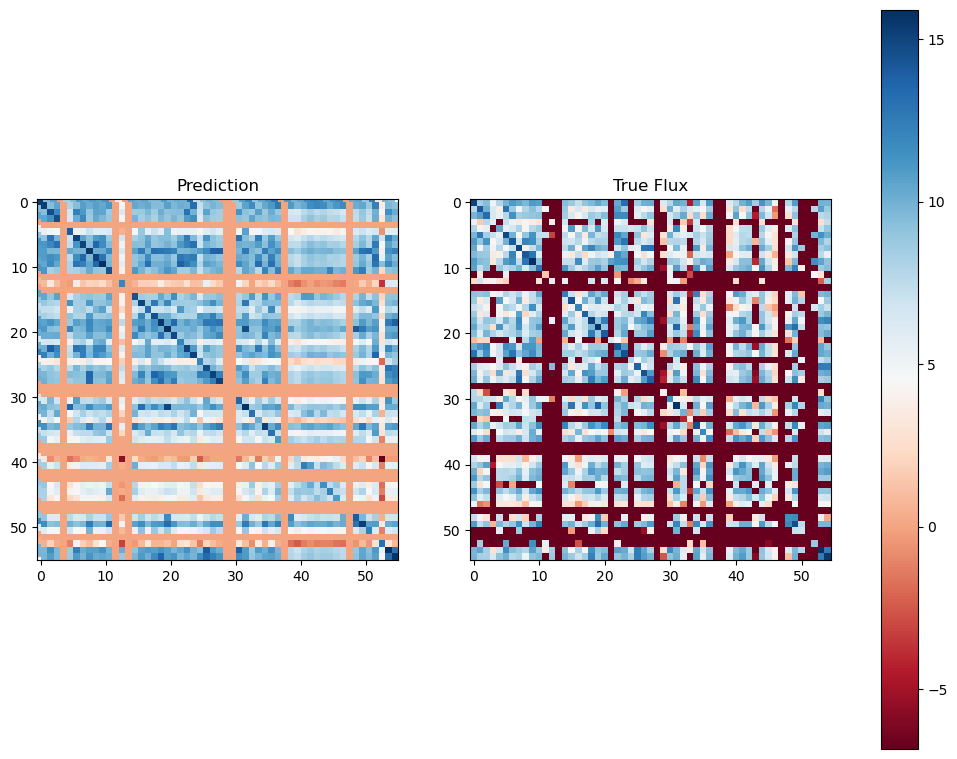

In [264]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches([12.8,9.6])

x=Prediction.index

ax[0].imshow(Z1, cmap='RdBu', interpolation='nearest')
ax[0].set(title='Prediction',autoscale_on=True)

ax[1].imshow(Z2, cmap='RdBu', interpolation='nearest')
ax[1].set(title='True Flux')

c=ax[0].pcolormesh(Z1, cmap='RdBu', vmin=Z1.values.min(), vmax=Z1.values.max())

fig.colorbar(c, ax=ax)

fig.savefig(path+'/Prediction_2019.png')

plt.show()

In [265]:
ax[0]

<AxesSubplot: title={'center': 'Prediction'}>

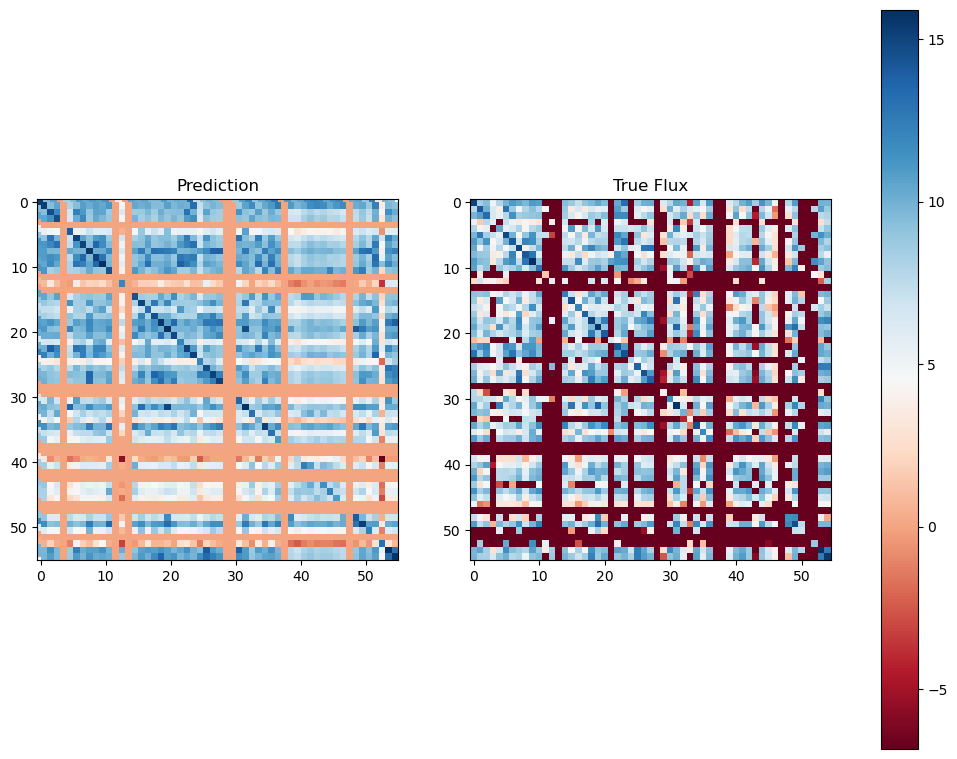

In [266]:
fig

## Metrics To Evaluate

>Delete the planning areas with empty data.

In [267]:
def erase_pre(empty_pa):
    return Prediction.drop(columns=empty_pa)[Prediction.index!=empty_pa]

In [268]:
def erase_true(empty_pa):
    return flux.drop(columns=empty_pa)[flux.index!=empty_pa]

In [269]:
for pa in ['NORTH-EASTERN ISLANDS','SIMPANG',\
           'MARINA EAST','MARINA SOUTH','ORCHARD',\
           'OUTRAM','STRAITS VIEW','CHANGI BAY','WESTERN ISLANDS']:
    
    if sum(Prediction[Prediction.index==pa].values[0])==0\
    and sum(Prediction[pa].values)==0\
    and sum(flux[Prediction.index==pa].values[0])==0\
    and sum(flux[pa].values)==0:
        
        Prediction = erase_pre(pa)
        flux = erase_true(pa)

In [270]:
Prediction.shape

(51, 51)

In [271]:
flux.shape

(51, 51)

|index|Planning Area|
| --- | --- |
|0|NORTH-EASTERN ISLANDS|
|1|SIMPANG| 
|2|MARINA EAST|
|3|MARINA SOUTH|
|4|ORCHARD|
|5|OUTRAM|
|6|STRAITS VIEW|
|7|CHANGI BAY|
|8|WESTERN ISLANDS|

### R2_score

In [272]:
from sklearn.metrics import r2_score

> Fill the diagonal of the Prediction with the actual data.

In [238]:
np.fill_diagonal(Prediction.values,np.diagonal(flux))

In [236]:
np.diagonal(flux)

array([3.647604e+06, 1.941872e+06, 1.020143e+06, 5.731000e+03,
       1.415590e+05, 2.968573e+06, 1.794525e+06, 3.329311e+06,
       1.903156e+06, 6.205365e+06, 7.556300e+05, 2.960000e+02,
       5.533000e+03, 5.730480e+05, 2.229105e+06, 4.515630e+05,
       1.523354e+06, 3.526617e+06, 5.547397e+06, 1.655423e+06,
       9.964000e+03, 2.154812e+06, 2.298965e+06, 2.613900e+04,
       1.366375e+06, 2.350340e+06, 1.385521e+06, 1.671000e+03,
       2.817450e+05, 5.497755e+06, 1.020420e+05, 1.447000e+03,
       2.529571e+06, 4.012680e+05, 2.814310e+05, 0.000000e+00,
       0.000000e+00, 3.648800e+04, 1.383050e+05, 7.843400e+04,
       7.088000e+03, 1.225470e+05, 3.724000e+03, 0.000000e+00,
       2.940620e+05, 2.550736e+06, 1.274800e+04, 0.000000e+00,
       4.484600e+04, 6.333523e+06, 4.778323e+06])

In [239]:
np.diagonal(Prediction)

array([3.647604e+06, 1.941872e+06, 1.020143e+06, 5.731000e+03,
       1.415590e+05, 2.968573e+06, 1.794525e+06, 3.329311e+06,
       1.903156e+06, 6.205365e+06, 7.556300e+05, 2.960000e+02,
       5.533000e+03, 5.730480e+05, 2.229105e+06, 4.515630e+05,
       1.523354e+06, 3.526617e+06, 5.547397e+06, 1.655423e+06,
       9.964000e+03, 2.154812e+06, 2.298965e+06, 2.613900e+04,
       1.366375e+06, 2.350340e+06, 1.385521e+06, 1.671000e+03,
       2.817450e+05, 5.497755e+06, 1.020420e+05, 1.447000e+03,
       2.529571e+06, 4.012680e+05, 2.814310e+05, 0.000000e+00,
       0.000000e+00, 3.648800e+04, 1.383050e+05, 7.843400e+04,
       7.088000e+03, 1.225470e+05, 3.724000e+03, 0.000000e+00,
       2.940620e+05, 2.550736e+06, 1.274800e+04, 0.000000e+00,
       4.484600e+04, 6.333523e+06, 4.778323e+06])

> R2_score

In [244]:
R2=r2_score(flux,Prediction)

In [245]:
R2

-76.61837564005417

### Adjusted R-Squared

In [247]:
n=flux.size
p=4 #T_i,m_i,n_j,s_ij

In [248]:
# n = number of sample size
# p = number of independent variables

Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

In [249]:
Adj_r2

-76.73797252085548

In [230]:
%who

Axes3D	 MRT	 MRT_flux	 Prediction	 T_i_MRT	 T_i_bus	 T_ij_MRT	 T_ij_bus	 Z1	 
Z2	 ax	 bus	 bus_flux	 c	 empty_pa	 erase_pre	 erase_true	 fig	 
flux	 gpd	 i	 j	 mpl	 np	 pa	 path	 pd	 
plt	 r2_score	 x	 
